# Data Science Methods for Clean Energy Research 
## *Distributions, PMFs / PDFs, CDF and sampling from distributions*

## Outline

Today, we will explore statistical distributions, create figures of their PDFs and PMFs, calculate their CDFs, and write some code to sample from the distributions.

### 1. Distribution functions
* 1.1 Probability mass functions, PMFs - for discrete random variables
* 1.2 Probability distribution functions, PDFs - for continuous random variables

### 2. Cummulative distribution functions

* 2.1 Empirical CDF
* 2.2 Interpolated PDF to get CDF
* 2.3 Scipy CDF's for analytical PDFs

### 3. Sampling from a distribution with the inverse CDF



## Import libraries

In [1]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import scipy.interpolate
import scipy.stats

%matplotlib inline
matplotlib.rcParams.update({'font.size': 20})

## 1. Distribution functions 


### 1.1 Discrete random variable probability mass functions - PMFs
### 1.1.1 The binomial distribution

Recall from lecture:

$$P(X=k)=P\left(n|k\right) = {{n}\choose {k}}
p^k q^{n-k} = \frac{n!}{k!(n-k)!}p^k\left(1-p\right)^{n-k}$$

Note, the above equation for the PMF was written using LaTeX in Markdown, for more information on LaTeX see [here](https://www.overleaf.com/learn/latex/Mathematical_expressions) is a guide to writing mathematical expressions with LaTeX.

#### Exercise 1 (in class) 

Create a function which describes the binomial PMF. 

*Hint:* look at `math.factorial` for computing factorials and `math.pow` for exponents. 

Note: The `math.pow` function ensures that the returned value is a `float` also it exectutes the command more rapidly than python's default `**` and is based on functions defined by the C standard. For more info see https://docs.python.org/3/library/math.html

In [2]:
ninefact = 9*8*7*6*5*4*3*2*1

ninefact

math.factorial(9)

362880

In [3]:
def binomial_pmf(p, n, k):
     
    prefactor = math.factorial(n) / ( math.factorial(k) * math.factorial(n-k) )
   
    probability = prefactor * math.pow(p, k) * math.pow(1-p, n-k)
    
    return probability

#### Flipping a fair coin with the binomial PMF

What is the binomial probability of getting 5 heads when flipping a fair coin 10 times?

$n$ = 10, $k$ = 5 and $p$ = 1/2

In [4]:
binomial_pmf(0.5,10,5)

0.24609375

What does the binomial distribution PMF look like as a function of $n$?
What is the largest possible value of $k$ ?

In [5]:
p = 0.5    # probability of success
n = 12     # number of observations

k_list = [ 0 + i for i in range(n+1) ]   

# print(k_list)
prob_tmp = []
for k in k_list:
    prob_tmp.append(binomial_pmf(p,n,k))
print(prob_tmp)

# Iterates over vales of k in k_list and call the binomial pmf for each of these values of k
prob_X_eq_k = [ binomial_pmf(p, n, k) for k in k_list ]
print(prob_X_eq_k)

# Another way to do this would be
prob_X_eq_k = [ binomial_pmf(p, n, k) for k in np.arange(0, n+1) ]
print(prob_X_eq_k)

[0.000244140625, 0.0029296875, 0.01611328125, 0.0537109375, 0.120849609375, 0.193359375, 0.2255859375, 0.193359375, 0.120849609375, 0.0537109375, 0.01611328125, 0.0029296875, 0.000244140625]
[0.000244140625, 0.0029296875, 0.01611328125, 0.0537109375, 0.120849609375, 0.193359375, 0.2255859375, 0.193359375, 0.120849609375, 0.0537109375, 0.01611328125, 0.0029296875, 0.000244140625]
[0.000244140625, 0.0029296875, 0.01611328125, 0.0537109375, 0.120849609375, 0.193359375, 0.2255859375, 0.193359375, 0.120849609375, 0.0537109375, 0.01611328125, 0.0029296875, 0.000244140625]


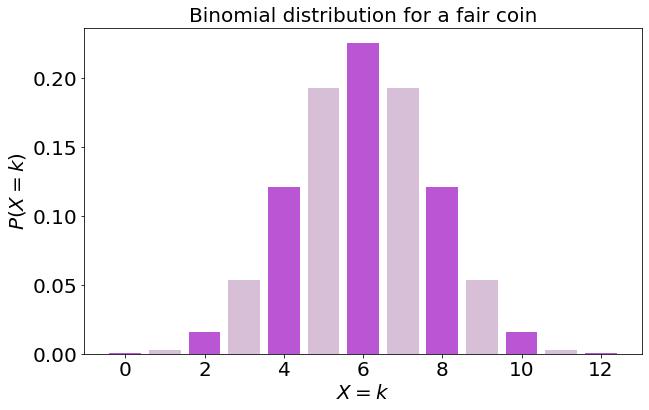

In [6]:
# Let's visualize it!

choice = ['mediumorchid','thistle']
bar_colors = [choice[j%2] for j in k_list]

plt.figure(figsize=(10,6))
plt.bar(k_list, prob_X_eq_k, color=bar_colors) 
plt.xlabel("$X=k$")
plt.ylabel("$P(X=k)$")
plt.title("Binomial distribution for a fair coin",fontsize=20)

plt.show()

Try increasing $k$ a bit more ... what happens? What if you set $k$ to be a float number?

In [7]:
binomial_pmf(0.5,12,0.2)

ValueError: factorial() only accepts integral values

#### Fair versus unfair coin 

In [8]:
n1 = 40
n2 = 100
p1 = 0.5
p2 = 0.8

pX1 = [binomial_pmf(p1, n1, k) for k in np.arange(0, n1 + 1)]
pX2 = [binomial_pmf(p2, n1, k) for k in np.arange(0, n1 + 1)]
pX3 = [binomial_pmf(p2, n2, k) for k in np.arange(0, n2 + 1)]

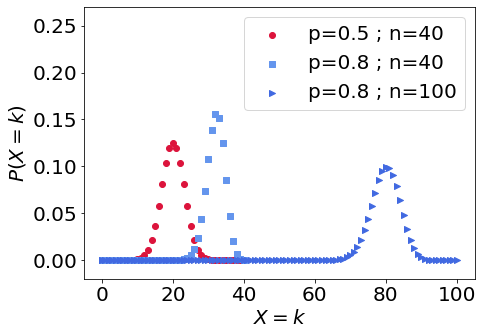

In [9]:
fig = plt.figure(figsize=(7, 5))
plt.scatter(np.arange(0, n1 + 1), pX1, c='crimson', label='p='+str(p1)+' ; '+'n='+str(n1))
plt.scatter(np.arange(0, n1 + 1), pX2, marker="s", c='cornflowerblue', label='p='+str(p2)+' ; '+'n='+str(n1))

plt.scatter(np.arange(0, n2 + 1), pX3, marker=">", c='royalblue', label='p='+str(p2)+' ; '+'n='+str(n2))
plt.xlabel('$X=k$')
plt.ylabel('$P(X=k)$')
plt.ylim([-0.02, 0.27])
plt.legend()
plt.show()

You can now reproduce the [Wikipedia plot](https://en.wikipedia.org/wiki/Binomial_distribution#/media/File:Binomial_distribution_pmf.svg). All you have to do is change the parameters!

### 1.1.2 The Poisson distribution

Recall the expression for the Poisson distribution, it is used to describe discrete random variable occurences within an interval

$$ P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!} $$

Let's create a function for $P(X=k)$ and include arguments for $\lambda$ and *k*

In [10]:
def poisson_pmf(lamb, k):
    
    probability = math.pow(lamb, k) * math.exp(-lamb) / math.factorial(k)
    
    return probability

Let's imagine that we know that our mean and standard deviations are equal to 2, i.e. $\lambda=2$ and see what $P_{\text poisson}(X=k)$ looks like

In [11]:
lamb = 2
[poisson_pmf(lamb, k) for k in np.arange(0, 21)]

[0.1353352832366127,
 0.2706705664732254,
 0.2706705664732254,
 0.1804470443154836,
 0.0902235221577418,
 0.03608940886309672,
 0.012029802954365574,
 0.0034370865583901638,
 0.0008592716395975409,
 0.00019094925324389798,
 3.8189850648779595e-05,
 6.943609208869018e-06,
 1.1572682014781697e-06,
 1.7804126176587226e-07,
 2.5434465966553178e-08,
 3.391262128873757e-09,
 4.2390776610921964e-10,
 4.987150189520231e-11,
 5.541277988355812e-12,
 5.832924198269276e-13,
 5.832924198269276e-14]

Let's reproduce this Wikipedia plot https://en.wikipedia.org/wiki/Poisson_distribution#/media/File:Poisson_pmf.svg

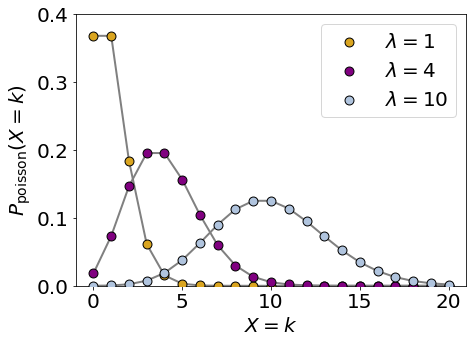

In [12]:
pX1 = [poisson_pmf(1, k) for k in np.arange(0, 21)]
pX2 = [poisson_pmf(4, k) for k in np.arange(0, 21)]
pX3 = [poisson_pmf(10, k) for k in np.arange(0, 21)]

fig = plt.figure(figsize=(7, 5))

plt.plot(np.arange(0, 21), pX1, c='grey', linewidth=2, zorder=0)
plt.plot(np.arange(0, 21), pX2, c='grey', linewidth=2, zorder=1)
plt.plot(np.arange(0, 21), pX3, c='grey', linewidth=2, zorder=2)

plt.scatter(np.arange(0, 21), pX1, s=80, c='goldenrod', edgecolors='k', label='$\lambda =1$', zorder=3)
plt.scatter(np.arange(0, 21), pX2, s=80, c='purple', edgecolors='k', label='$\lambda =4$', zorder=4)
plt.scatter(np.arange(0, 21), pX3, s=80, c='lightsteelblue',  edgecolors='k', label='$\lambda =10$', zorder=5)

plt.legend()
plt.ylim([0, 0.4])
plt.ylabel("$P_{\sf poisson}(X=k)$")
plt.xlabel("$X=k$")

plt.show()

### 1.2 Continuous random variable probability distribution functions - PDFs

### 1.2.1 The Gaussian distribution a.k.a the Normal distribution

Recall from the slides, that for a given variance $\sigma^2$ and mean $\mu$ the probability of the random variable $X=x$ according to the Normal distribution is

$$P(x) = \frac{1}{\sqrt{2 \pi \sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}} $$

#### Exercise 2 (in class)
Define a function for the Normal PDF. It should take $x$, $\mu$, $\sigma$ in input

In [13]:
def normal_pdf(x, mu, sigma):
    prefactor = math.pow( 2*math.pi*math.pow(sigma, 2), -0.5 ) 
    probability = prefactor * math.exp( -math.pow(x-mu, 2) / (2*math.pow(sigma, 2)) )
    return probability

In [14]:
normal_pdf(5, 0, 1)

1.4867195147342977e-06

Call the function on a list of numbers

Hint: look at `np.linspace`

In [15]:
[ normal_pdf(x, 0, 1) for x in np.linspace(-10, 10, 21) ]

[7.69459862670642e-23,
 1.0279773571668917e-18,
 5.052271083536893e-15,
 9.134720408364594e-12,
 6.075882849823286e-09,
 1.4867195147342977e-06,
 0.00013383022576488537,
 0.0044318484119380075,
 0.05399096651318806,
 0.24197072451914337,
 0.3989422804014327,
 0.24197072451914337,
 0.05399096651318806,
 0.0044318484119380075,
 0.00013383022576488537,
 1.4867195147342977e-06,
 6.075882849823286e-09,
 9.134720408364594e-12,
 5.052271083536893e-15,
 1.0279773571668917e-18,
 7.69459862670642e-23]

Let's plot the **Standard Normal PDF**

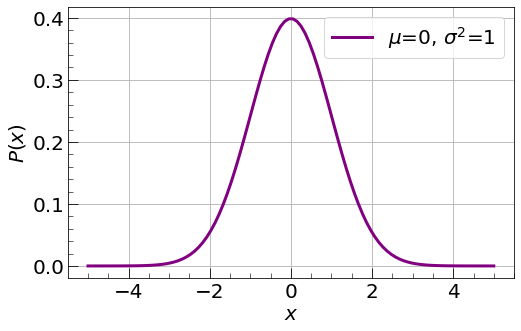

In [16]:
pX = [normal_pdf(x, 0, 1.0) for x in np.linspace(-5, 5, 100)]

fig = plt.figure(figsize=(8,5))
ax1 = plt.plot(np.linspace(-5, 5, 100), pX, c='purple', linewidth=3, label='$\mu$=0, $\sigma^{2}$=1')
plt.legend(loc='upper right')
plt.xlabel('$x$')
plt.ylabel('$P(x)$')
plt.grid(True)
plt.minorticks_on()
plt.tick_params(direction='in', length=10)
plt.tick_params(which='minor', direction='in', length=5)
plt.show()

### 2. Cummulative distribution functions

Let's look at the CDF for an empirical distribution. Recall this from our descriptive statistics notebook.

In [35]:
data = pd.read_csv('http://faculty.washington.edu/dacb/HCEPDB_moldata.zip') # Make sure you have the correct path specified

population = data.sample(frac = 0.001) 
population.describe()

,id,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha
count,2.323000e+03,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000
mean,1.343686e+06,415.048280,3.917990,0.552678,120.122864,-5.176343,1.883188,-3.293154
std,8.575310e+05,60.471296,2.501403,0.307485,65.803560,0.309196,0.391089,0.389056
min,1.050000e+02,225.321900,0.000000,0.000000,0.000000,-6.539220,0.891706,-4.366689
25%,6.415440e+05,377.475500,2.057627,0.341747,69.671923,-5.375799,1.585907,-3.580632
50%,1.221678e+06,414.583600,3.468125,0.543358,111.468683,-5.165092,1.869743,-3.289691
75%,1.992664e+06,458.590300,5.566257,0.757584,163.441233,-4.966651,2.163142,-3.008147
max,3.102744e+06,630.271000,11.097616,1.939220,338.400531,-4.157839,3.156542,-2.011604


Let's plot our `'mass'` column again

<AxesSubplot:>

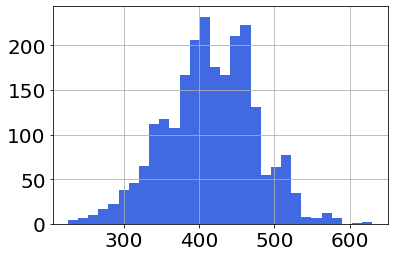

In [38]:
population['mass'].hist(bins=30, color='royalblue')

### 2.1 Empirical CDF

Now we want to compute the cummulative distribution function of this discrete data set 
$F_X(x) = \sum_{i=0}^{\left\lfloor k \right\rfloor
}P(X=i)$, we can approximate it as the normalized sum of counts $C_k$ up to the $k-th$ bin of width $\Delta k$ with $N_{bins}$ from our histogram, i.e.

$$F_X(k) \approx \sum_{j=1}^{N_k} C_j \cdot \Delta j$$


[0.00012757 0.00022324 0.00031891 0.00054215 0.00070161]
dx*p(x) [ 53.99321333  94.48812333 134.98303333 229.47115667 296.96267333]
cdf(x) [0.00172191 0.00473526 0.00904003 0.01635816 0.02582867]


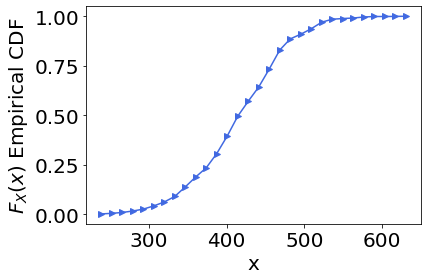

In [49]:
num_bins = 30
normed_counts, bin_edges = np.histogram(population['mass'].values, bins=num_bins, density=True)

print(normed_counts[0:5])


cdf = np.cumsum(normed_counts*np.diff(bin_edges))


print("dx*p(x)", np.diff(bin_edges)[0]*counts[0:5])
print("cdf(x)", cdf[0:5])
plt.plot (bin_edges[1:], cdf, '->', color='royalblue') 
plt.xlabel('x')
plt.ylabel('$F_X(x)$ Empirical CDF')
plt.show()


### 2.2 Interpolating to compute the empirical CDF

If you aren't sure what interpolation is, read [this](https://en.wikipedia.org/wiki/Interpolation). We will look at an example of interpolation when we introduce the concept of Regression, in that case we will consider linear interpolation.

We will procede as above and interpolate our CDF bins to get a smoother function.

In [57]:
def inverse_cdf(data, set_bins=40):
    
    hist_data, bin_edges = np.histogram(data, bins=set_bins, density=True)
    cdf_bins = np.cumsum(hist_data * np.diff(bin_edges))
    cdf_bins = np.insert(cdf_bins, 0, 0)
    #print(cdf_bins.shape, bin_edges.shape)
    
    inv_cdf = scipy.interpolate.interp1d(cdf_bins, bin_edges)
    cdf = scipy.interpolate.interp1d(bin_edges, cdf_bins)
    
    return [cdf, inv_cdf]

Use the cell below to call our function with `set_bins = 30`

In [61]:
cdf, inv_cdf = inverse_cdf(population['mass'].values, set_bins=30)

(31,) (31,)


Let's plot the CDF!

In [62]:
xmin = np.min(population['mass'].values)
xmax = np.max(population['mass'].values)
x = np.linspace(xmin, xmax, 1000)

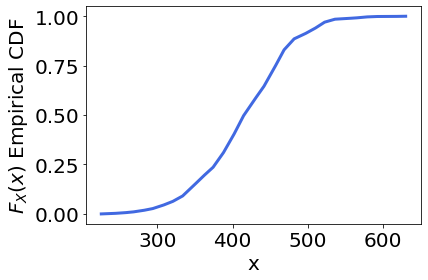

In [63]:
plt.figure()
plt.plot(x, cdf(x),'-',lw='3',color='royalblue')
plt.xlabel('x')
plt.ylabel('$F_X(x)$ Empirical CDF')
plt.show()

### 2.3 Some CDFs are implemented in scipy 

Many CDFs are implemented in scipy, for more info see [here](https://docs.scipy.org/doc/scipy/reference/stats.html).

Let's look at a Normal distribution

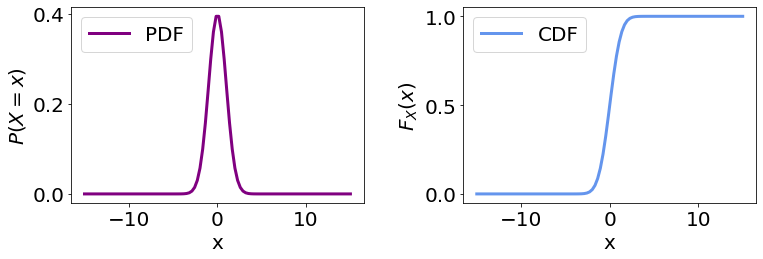

In [64]:
x = np.linspace(-15,15, 100) 

fig, ax = plt.subplots(1,2, figsize=(11,4))


ax[1].plot(x,scipy.stats.norm.cdf(x),'-', lw=3, color='cornflowerblue', label='CDF')

ax[1].set_xlabel('x')
ax[1].set_ylabel('$F_X(x)$')
ax[1].legend(loc='upper left')


ax[0].plot(x, scipy.stats.norm.pdf(x),'-', lw=3, color='purple', label='PDF')

ax[0].set_ylabel('$P(X=x)$')
ax[0].set_xlabel('x')
ax[0].legend(loc='upper left')

plt.tight_layout()

For a binomial distribution

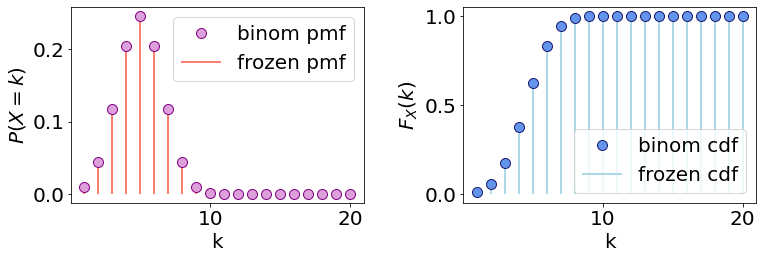

In [65]:
x = np.linspace(1,20, 20)
# n = 10 ; p = 0.5
cdf_x = scipy.stats.binom.cdf(x, 10, 0.5)
pmf_x = scipy.stats.binom.pmf(x, 10, 0.5)
rv = scipy.stats.binom(10, 0.5)


fig, ax = plt.subplots(1,2, figsize=(11,4))

ax[0].plot(x, pmf_x,'o', lw=2, color='plum', markeredgecolor='purple', markersize=10, label='binom pmf')
ax[0].vlines(x, 0, rv.pmf(x), colors='salmon', linestyles='-', lw=2, label='frozen pmf')
ax[0].set_xlabel('k')
ax[0].set_ylabel('$P(X=k)$')
ax[0].legend()


ax[1].plot(x, cdf_x,'o', lw=2, color='cornflowerblue', markeredgecolor='midnightblue', markersize=10, label='binom cdf')
ax[1].vlines(x, 0, rv.cdf(x), colors='lightblue',  linestyles='-', lw=2, label='frozen cdf')
ax[1].set_ylabel('$F_X(k)$')
ax[1].set_xlabel('k')
ax[1].legend()

plt.tight_layout()


## 3. Sampling from distributions using the inverse CDF

In [66]:
zero2one = np.linspace(0, .9999, num=100)

Let's begin by plotting the inverse CDF

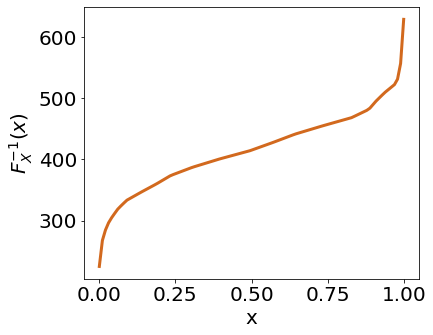

In [70]:
plt.figure(figsize=(6, 5))

plt.plot(zero2one, inv_cdf(zero2one),lw=3,color="chocolate")
plt.xlabel("x")
plt.ylabel("$F^{-1}_X(x)$")
plt.show()

Now we can sample from our inverse CDF to generate values from our empirical distribution

Let's do that with `np.random.rand`. Why are we using this random function? What is special about how it works that makes it useful with inverse CDF?

OK, let's put this together with something like:

`sample = inv_cdf(np.random.rand(1000))`

In [79]:
sample = inv_cdf(np.random.rand(10000))

Now make a histogram of sample and set the bins to 100. How does it look? What happens when you increase the argument to `np.random.rand`?

Recall our original distribution

<AxesSubplot:>

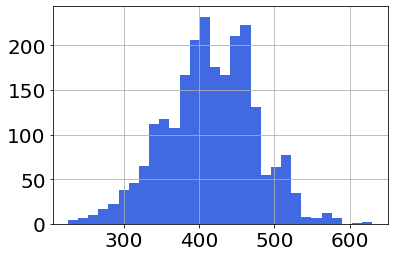

In [73]:
population['mass'].hist(bins=30, color='royalblue')

#### Exercise 3 (in class)
Make your histogram hereafter and play with the number of points in your sample! 

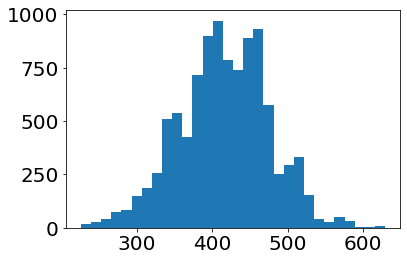

In [80]:
fig, ax = plt.subplots(1,1)
plt.hist(sample, bins = 30);